
<h1>Jane Street Market Prediction Model</h1>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats
warnings.filterwarnings('ignore')




In [37]:
data = loaded_data

In [2]:
data = pd.read_csv('Data/train.csv') #training data
features = pd.read_csv('Data/features.csv')

In [3]:
loaded_data = data

### Dataset Description

This dataset contains an anonymized set of features representing real stock market data => `feature_{0..129}`

The goal is to either make the trade or pass on it

`weight` and `resp` together represent return on the trade

`date` represents day of the trade
`ts_id` represents time ordering

`resp_{1,2,3,4}` represent time horizons

In [4]:
data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [5]:
data.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,...,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,...,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01,1.195245e+06
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02,9.999518e-01,2.559373e+00,2.477335e+00,...,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00,6.900755e+05
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00,0.000000e+00
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03,-1.000000e+00,-1.299334e+00,-1.263628e+00,...,-1.123252e+00,-1.114326e+00,-9.512009e-01,-9.133750e-01,-1.212124e+00,-1.452912e+00,-8.993050e-01,-1.278341e+00,-8.544535e-01,5.976225e+05
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05,1.000000e+00,-1.870182e-05,-7.200577e-07,...,0.000000e+00,7.006233e-17,6.054629e-17,4.870826e-17,-2.558675e-16,1.015055e-16,5.419920e-17,8.563069e-17,4.869529e-17,1.195245e+06
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03,1.000000e+00,1.578417e+00,1.526399e+00,...,1.342829e+00,1.405926e+00,1.308625e+00,1.228277e+00,1.409687e+00,1.767275e+00,1.111491e+00,1.582633e+00,1.125321e+00,1.792868e+06
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390490e+06


In [6]:
print("hello world)")

hello world)



### Data Distribution
Lets look at skewness of some of the features

###### Question: When dealing with hundreds of predictors, is there a way to look only consider the predictors that are the most skewed or least skewed?
- when predictability is important, it may be best to only consider predictors that are not skewed

(array([2.312047e+06, 6.896000e+03, 1.674000e+03, 6.810000e+02,
        3.070000e+02, 1.890000e+02, 1.210000e+02, 7.500000e+01,
        3.700000e+01, 1.600000e+01, 1.200000e+01, 5.000000e+00,
        9.000000e+00, 9.000000e+00, 3.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]),
 array([ -4.22397868,  33.32421512,  70.87240892, 108.42060272,
        145.96879651, 183.51699031, 221.06518411, 258.61337791,
        296.16157171, 333.70976551, 371.25795931, 408.80615311,
        446.3543469 , 483.9025407 , 521.4507345 , 558.9989283 ,
        596.5471221 , 634.0953159 , 671.6435097 , 709.1917035 ,
        746.73989729]),
 <BarContainer object of 20 artists>)

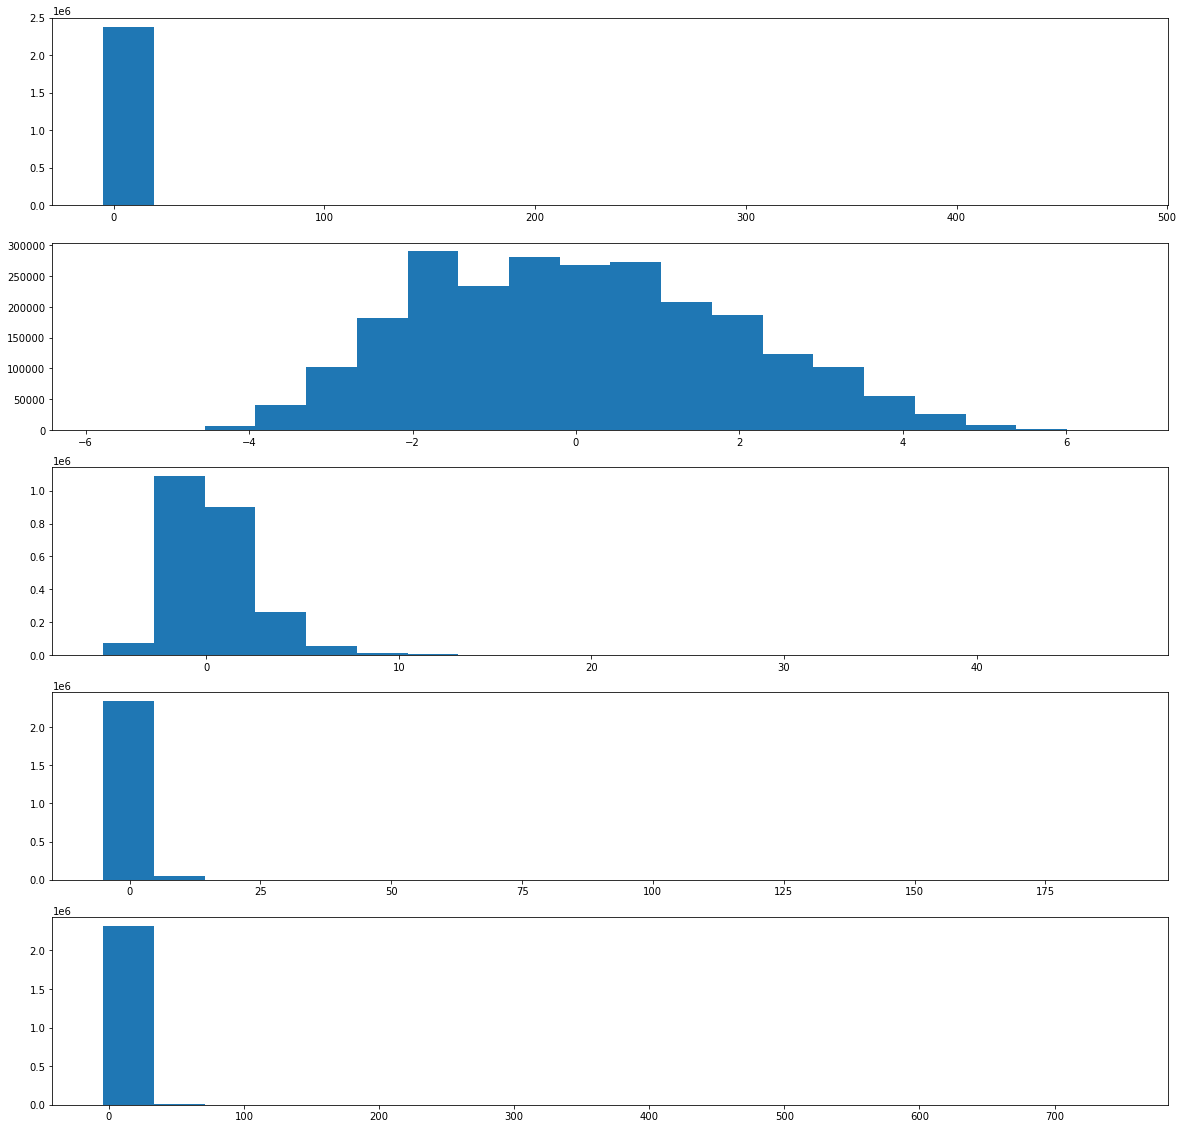

In [7]:
#plot some of the features to check for skewness
#lets plot 5 features for now

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(20, 20))

ax1.hist(data["feature_50"].values, bins=20)

ax2.hist(data["feature_52"].values, bins=20)

ax3.hist(data["feature_53"].values, bins=20)

ax4.hist(data["feature_54"].values, bins = 20)

ax5.hist(data["feature_55"].values, bins = 20)

In [8]:
#Determine which of the 129 features have significantly skewed data
#   - what is the skewness of the data
#   - what is the ratio of the highest to lowerst value (greater than 20?)

#add column for skewness and ratio


In [9]:
#What are the features that are highly skewed
#this transformation only works for positive values, so leave for now
'''
skewness_of_data = data.skew(axis = 0)
highly_skewed = skewness_of_data[np.abs(skewness_of_data > 1)]
for label in highly_skewed.iteritems():
    data[label[0]] = np.log(data[label[0]])
'''

'\nskewness_of_data = data.skew(axis = 0)\nhighly_skewed = skewness_of_data[np.abs(skewness_of_data > 1)]\nfor label in highly_skewed.iteritems():\n    data[label[0]] = np.log(data[label[0]])\n'

In [10]:
my_dict = {"Label_1": [1, 2, 3, 4], "Label_2": [5, 6, 7, 8],\
         "Label_3":[9,10,11,12]}
my_dict = pd.DataFrame(my_dict)
my_dict["Label_1"] = np.power(my_dict["Label_1"],2) #2 is broadcasted



In [11]:
np.random.gamma(2, size = 20)

array([3.40412364, 3.03561055, 0.63662688, 2.00215994, 0.59276364,
       0.92242901, 0.85168778, 1.0099102 , 1.16450031, 2.6037923 ,
       3.02884372, 0.50689775, 1.44578326, 0.82778519, 2.29180359,
       0.58158797, 0.62317137, 1.8941762 , 1.15503769, 3.22074165])

In [12]:
colors = ['b','o']
for k, m in enumerate(colors):
    print(k,m)

0 b
1 o


---------------------------------------------------------------------

<h2>Feature Engineering and Extraction</h2>

In [13]:
#seperate features and non-features (not everyting in the notebook is a feature)
features = []
non_features = []
for column in data.columns:
    if "feature" in column:
        features.append(column)
    else:
        non_features.append(column)


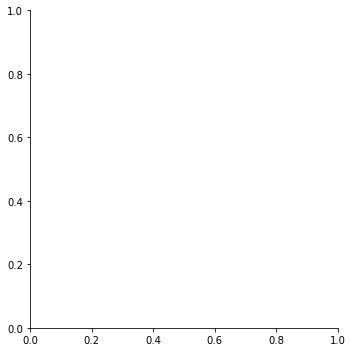

In [14]:
sns.displot()
        

In [15]:
data[non_features].head(15)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,4
5,0,0.000000,-0.001047,-0.002700,0.000743,0.004667,0.001282,5
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,6
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,7
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,8
9,0,0.160117,0.005976,0.004345,0.023712,0.035360,0.020317,9


In [16]:
#We have 2390491 rows
#How many of these rows have weights = negative infinity
# how many of these rows have weights = positive infinity
# How many of these rows have weights = 0

resp value represent returns over different time horizons
Weight * resp apparently represents total return

What is the relationship between the weight and the resp value?
How are the respo values distributed?
Create a function for graphing the ditreibution of the histogram


In [17]:
def give_distribution(resp):
    plt.style.use("ggplot")
    plt.hist(data[resp].values, bins = 100)
    plt.xlabel("Values")
    plt.ylabel("")

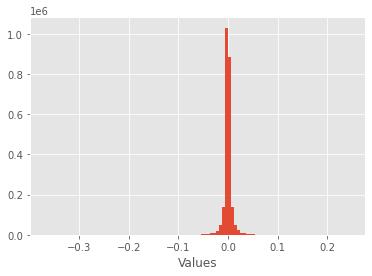

In [18]:
give_distribution("resp_1")

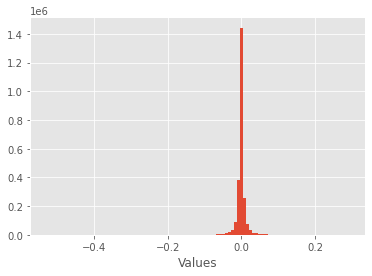

In [19]:
give_distribution("resp_2")

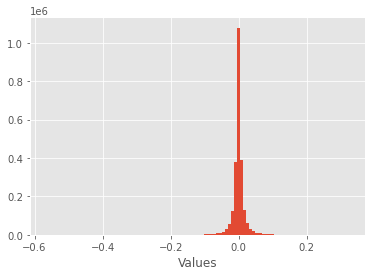

In [20]:
give_distribution("resp_3")

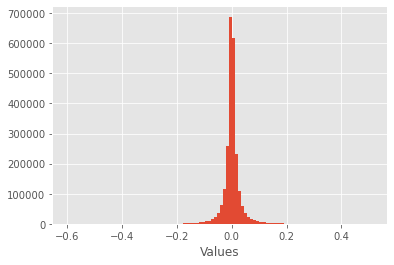

In [21]:
give_distribution("resp_4")

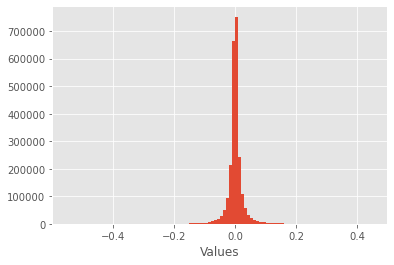

In [22]:
give_distribution("resp")

In [23]:
#it may be beneficial to remove outliers from the dataset

data[["resp", "resp_1", "resp_2", "resp", "weight"]].describe()

,resp,resp_1,resp_2,resp,weight
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06
mean,4.083113e-04,1.434969e-04,1.980749e-04,4.083113e-04,3.031535e+00
std,2.693609e-02,8.930163e-03,1.230236e-02,2.693609e-02,7.672794e+00
min,-5.493845e-01,-3.675043e-01,-5.328334e-01,-5.493845e-01,0.000000e+00
25%,-7.157903e-03,-1.859162e-03,-2.655044e-03,-7.157903e-03,1.617400e-01
50%,8.634997e-05,4.552665e-05,6.928179e-05,8.634997e-05,7.086770e-01
75%,7.544347e-03,2.097469e-03,2.939111e-03,7.544347e-03,2.471791e+00
max,4.484616e-01,2.453477e-01,2.949339e-01,4.484616e-01,1.672937e+02


WE know that the relationship between weight and resp is that weight * resp gives the return for that trade. What is the relationship between weight and resp (i.e. What is the correlation) ?

In [24]:
max(data["weight"])

167.2937151011765

In [25]:
'''
Kind of ugly looking plot compared to jointplot. Maybe use jointplot
exclusively?
plt.style.use("ggplot")
sns.regplot(x = "weight", y = "resp", data = data, color="darkorange")
'''


'\nKind of ugly looking plot compared to jointplot. Maybe use jointplot\nexclusively?\nplt.style.use("ggplot")\nsns.regplot(x = "weight", y = "resp", data = data, color="darkorange")\n'

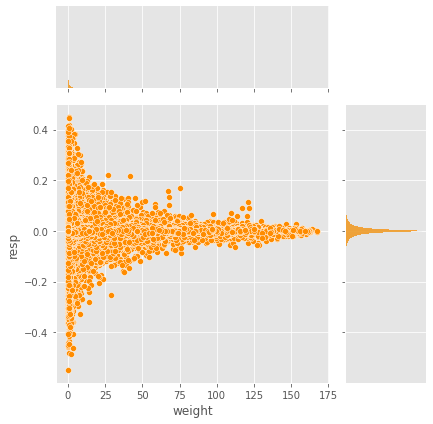

In [26]:
def weight_resp_distribution(y):
    plt.style.use("ggplot")
    sns.jointplot(x = "weight", y = y, data = data, kind='scatter', color='darkorange', ratio=3)
    plt.show()
weight_resp_distribution("resp")



In [57]:
#Sorting all the missing values
new_frame = pd.DataFrame({"Column Name": model_data.columns, "percent missing": model_data.isnull().sum()/model_data.shape[0]})
new_frame.sort_values('percent missing', inplace=True, ascending = False)
new_frame

,Column Name,percent missing
feature_0,feature_0,0.0
feature_93,feature_93,0.0
feature_87,feature_87,0.0
feature_88,feature_88,0.0
feature_89,feature_89,0.0
...,...,...
feature_39,feature_39,0.0
feature_38,feature_38,0.0
feature_37,feature_37,0.0
feature_36,feature_36,0.0


In [28]:

# Find out how many missing values there are in each column,
# and sort from highest to lowest
# Deal with missing values, wither through tree classification or through
# filling the missing values with averages
# use k-means clustering to group together all the highly correlated 
# variables

# Read https://www.kaggle.com/prateeknigam/eda-assignment
# Read https://www.kaggle.com/jeeperscreepers/jane-street-eda

# Review plotting in Matplotlib, seaborn, 

#Review how to bucket and graph with matplotlib, seaborn, or with excel

data["weight", "resp"].isnull().sum()

In [53]:
data[["weight", "resp"]].isnull().sum()
#Our targets have no missing values

weight    0
resp      0
dtype: int64

In [54]:
features.append("weight")
features.append("resp")


In [55]:
model_data = data[features]


In [56]:
#Some of our data types are not numerical but are objects
#for column in model_data.columns:
#    print("Column {} is {}".format(column, model_data[column].dtype))

#Not all features are floats, but previous formatting from somepoint
#earlier made them all floats. Will change this
for column in model_data.columns:
    column_mean = model_data[column].mean()
    model_data[column] = model_data[column].fillna(column_mean)


In [33]:
model_data[["feature_7", "feature_8"]].describe()

,feature_7,feature_8
count,1.997356e+06,1.997356e+06
mean,5.177655e-02,2.682810e-02
std,1.768331e+00,2.026105e+00
min,-2.815943e+01,-4.188122e+01
25%,-7.753547e-01,-9.251575e-01
50%,5.402186e-17,7.246478e-17
75%,8.541611e-01,9.517048e-01
max,3.300261e+01,4.068199e+01


In [36]:
model_data[["feature_7", "feature_8", "feature_9"]].notnull().head()

,feature_7,feature_8,feature_9
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


Not all of our features are numerical values. As we can see, some of our features are boolean values.

We will attempt to do lienar regression with only the values that are numerical, before later on encoding the non-numerical variable and testing if R squared increases or if our accuracy increases.

In [ ]:
#For each column, 

<h3>Ordinary Least Squares Model</h3>

In [43]:
#we will use sklearn train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [41]:
#splitting X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(model_data[features], model_data["weight"] * model_data["resp"], test_size = 0.,\
                                                   random_state = 5)


In [58]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
#try to predict y
y_hat = ols_model.predict(X_test)
mean_absolute_error(y_hat, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The decision to buy a stock or not, according to linear regression,
can be based on a certain threshold of predicted profit